# Business Problem

## Business Situation

All in One Co. is a multibrand outlet that wants to create a loyality program the best customers called INSIDERS. The company has registered one year of purchasing from its customers and wants to reward those customers with marketing actions. 

Business Questions:
- Who are the customers elegible?
- How many customers will be part of Insiders group?
- What are the main behaviour of those customers?
- How much revenue comes from Insiders customer groups?
- How much revenue is expected from Insiders next month?
- Which conditions one person must comply to be an Insider?
- What removes a customer from Insider group?
- What guarantees the loyality program customers are better than others?
- Which actions MKT team could take to increase revenue?

## Business Understanding & Solution Planning

A) <u>Business problem (open question)</u> - **How could we identify customers to a loyality program?**

B) <u>Business understanding</u>

- **Motivation?** The company wants to identify the most valuable customers in order to promote a loyality program and increase engagement/purchasing from those customers. MKT team wants to address some initiatives to increase revenue from this valuable group. Thus, was requested to Data team to evaluate current purchasing data  and propose tools to help the company build the Insiders program. 

- **Root cause**: Increase revenue

- **Scope**: (closed affirmation): 
  - Firstly: Build a tool to help identify most valuable customers from actual (one year) purchasing database
  - Secondarily: Build a report to answer some business questions and support MKT initiatives. 
  
    
- **Stakeholder**? CFO


- **Acceptance Criteria**: ??

### Planning Solution

**Solution overview**:

 - <u>Kind of problem</u>: Most valuable customers identification in order to frame into loyality program
 - <u>Potential methods</u>: Clustering

#### Inputs

- Business Problem, i.e, identify most valuable customers in order to create a new loyality program and increase revenue through marketing actions
- Products sales data from Nov 2015 to Dec 2017
- Tools: 
    - Python
    - Jupyter Nb
    - Pandas, Seaborn, Sklearn, etc

#### Outputs

- Provide a list of customers that will be part of Insiders Loyality Program:


    - List format:
            client_id | is_insider:
            234213213 | no  / 0
            324325252 | yes / 1
            435345353 | yes / 1
            
            
- Report answering business questions:


    - 1. Who are the customers elegible?
    - 2. How many customers will be part of Insiders group?
    - 3. What are the main behaviour of those customers?
    - 4. How much revenue comes from Insiders customer groups?
    - 5. How much revenue is expected from Insiders next month?
    - 6. Which conditions one person must comply to be an Insider?
    - 7. What removes a customer from Insider group?
    - 8. What guarantees the loyality program customers are better than others?
    - 9. Which actions MKT team could take to increase revenue?

#### Tasks

- 1. Who are the customers elegible?

    - Who is most valuable customers? => Must be evaluated with business experts
        - Revenue:
            - High ticket?
            - High LTV?
            - High frequency?
            - High basket size?
            - Low churn?
        - Cost:
            - Low return rate?
            - Low CAC?
            
        - Experience:
            - High xp evaluation?
            
- 2. How many customers will be part of Insiders group?
        - Total of customers
        - % Insiders
        
- 3. What are the main behaviour of those customers?
        - Stratify customers characteristics and consumptions habits -> clustering features
        
- 4. How much revenue comes from Insiders customer groups?
        - Total revenue
        - Revenue from insiders
        
- 5. How much revenue is expected from Insiders next month?
        - LTV Insiders group
        - Cohort analysis (time, product, etc) 
        
- 6. Which conditions one person must comply to be an Insider?
        - Person must obbey clustering parameters
        - Retrain clustering to identify (1, 3 months)


- 7. What removes a customer from Insider group?
        - Persons that don't follow clustering parameters will be excluded
        - Retrain clustering to identify (1, 3 months)

- 8. What guarantees the loyality program customers are better than others?
        - A/B testing

- 9. Which actions MKT team could take to increase revenue?
        - Special offers, purchasing preference, free shipment, etc
        


#### Solution Benchmarks 

**Desk Research**
- RFM model (Recency, Frequency, Monetary) => MVP
    - Step1: Pick one scope and order customers
    - Step2: Split and rank (R-Score, F-Score, M-Score) the customers according to levels (ex: Lvl 1-5, 20% of customer in each level)
    - Step3: Calculate mean from R-Score, F-Score, M-Score and order
    - See RFM Segmentation and strategies to engage customers

## Project Assumptions

- invoice_no with letter 'C' will be considered returned goods
- Text in stock_code will be dropped
- Prices below 0.04 will considered as error

## Others

C) Insights


D) Business Results


E) Conclusion (Objectives reached? Problems faced?)


F) Next Steps

G) Lessons learned

# 0. Imports

In [1]:
import pandas as pd
import seaborn as sns
import inflection
import re
import umap.umap_ as umap
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from plotly import express as px

SEED = 42

C:\Users\marco\Anaconda3\envs\insiders-clustering\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 0.1 Helper Functions

## 0.2 Loading Data

In [2]:
#load data
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding = "ISO-8859-1")
#drop undesired column
df_raw = df_raw.drop(columns='Unnamed: 8')

In [3]:
df_raw

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France


# 1. Data Description

In [4]:
df1 = df_raw.copy()

## 1.0 Rename Columns

In [5]:
#transforming to columns to snake_case 
new_cols=[]

for col in df1.columns:
    new_cols.append(inflection.underscore(col))  
    
df1.columns = new_cols 

## 1.1 Data Dimensions

In [6]:
print('The dataset has {} rows'.format(df1.shape[0]))
print('The dataset has {} attributes'.format(df1.shape[1]))

The dataset has 541909 rows
The dataset has 8 attributes


Ok, Pandas is capable to deal with this data volume

## 1.2 Check NAs

In [7]:
df1.isna().sum() / df1.shape[0]

invoice_no      0.000000
stock_code      0.000000
description     0.002683
quantity        0.000000
invoice_date    0.000000
unit_price      0.000000
customer_id     0.249267
country         0.000000
dtype: float64

### 1.2.1 Adjust NAs

In [8]:
#in order to build end-to-end 1st crisp cycle NA will be removed => must be dealt next crisp
df1 = df1.dropna(subset=['description','customer_id'])

In [9]:
df1.isna().sum() / df1.shape[0]

invoice_no      0.0
stock_code      0.0
description     0.0
quantity        0.0
invoice_date    0.0
unit_price      0.0
customer_id     0.0
country         0.0
dtype: float64

In [10]:
print('Removed {:.2f}% of original dataset caused by NAs - Will be dealt later'.format((100-(df1.shape[0]/df_raw.shape[0])*100)))

Removed 24.93% of original dataset caused by NAs - Will be dealt later


## 1.3 Data Types

In [11]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

- invoice_no / stock_code contains letters in its composition => mantain object
- customer_id => adjust to int
- invoice_date => adjust to datetime

### 1.3.1 Adjust Data Types

In [12]:
#invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

#customer_id
df1['customer_id'] = df1['customer_id'].astype('int')

In [13]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [14]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

# 2. Descriptive Statistics

In [15]:
df2 = df1.copy()

### 2.1 Numerical Attributes

In [16]:
num_att = df2.select_dtypes(include=['int32','int64','float64'])

In [17]:
num_att.agg(["min","max","mean","median","std","skew","kurtosis"]).T.reset_index().rename(columns= {'index' : 'features'})

,features,min,max,mean,median,std,skew,kurtosis
0,quantity,-80995.0,80995.0,12.061303,5.00,248.693370,0.182663,94317.563673
1,unit_price,0.0,38970.0,3.460471,1.95,69.315162,452.219019,246924.542988
2,customer_id,12346.0,18287.0,15287.690570,15152.00,1713.600303,0.029835,-1.179982


<h2>To investigate:</h2>

- quantity: Seems some problems (<0) => maybe returned goods?


- unit_price == 0 => maybe offers?

### 2.2 Categorical Attributes

In [18]:
cat_att = df2.select_dtypes(exclude=['int32','int64','float64','datetime64[ns]'])

In [19]:
cat_att.agg(['count','unique']).T.reset_index().rename(columns= {'index' : 'features'})

,features,count,unique
0,invoice_no,406829,"[536365, 536366, 536367, 536368, 536369, 53637..."
1,stock_code,406829,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,..."
2,description,406829,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
3,country,406829,"[United Kingdom, France, Australia, Netherland..."


<h2>To investigate:</h2>

- invoice_no: There are some invoices with "C" => probably return goods


- stock_code: There are some garbage (text) and some duplicated codes with letters in the end


- country: seems ok, but have 'Unspecified' category. Understand how to deal with it


# 3. Feature Filtering

In [20]:
df3 = df2.copy()

## 3.1 Check Strutural/Business Problems

In [21]:
for i in sorted(df3['country'].unique()):
    print(i)

Australia
Austria
Bahrain
Belgium
Brazil
Canada
Channel Islands
Cyprus
Czech Republic
Denmark
EIRE
European Community
Finland
France
Germany
Greece
Iceland
Israel
Italy
Japan
Lebanon
Lithuania
Malta
Netherlands
Norway
Poland
Portugal
RSA
Saudi Arabia
Singapore
Spain
Sweden
Switzerland
USA
United Arab Emirates
United Kingdom
Unspecified


In [22]:
for i in sorted(df3['stock_code'].unique()):
    print(i)

10002
10080
10120
10123C
10124A
10124G
10125
10133
10135
11001
15030
15034
15036
15039
15044A
15044B
15044C
15044D
15056BL
15056N
15056P
15058A
15058B
15058C
15060B
16008
16010
16011
16012
16014
16015
16016
16020C
16033
16043
16045
16046
16048
16049
16052
16054
16151A
16156L
16156S
16161G
16161M
16161P
16161U
16162L
16162M
16168M
16169E
16169K
16169M
16169N
16169P
16202A
16202B
16202E
16206B
16207A
16207B
16216
16218
16219
16225
16235
16236
16237
16238
16244B
16248B
16254
16258A
16259
17001
17003
17007B
17011F
17012A
17012B
17012C
17012D
17012E
17012F
17013D
17014A
17021
17028J
17038
17084A
17084J
17084N
17084P
17084R
17090A
17090D
17091A
17091J
17096
17107D
17109D
17129F
17136A
17164B
17165D
17174
17191A
18007
18094C
18097A
18097C
18098C
20615
20616
20617
20618
20619
20622
20652
20653
20654
20655
20657
20658
20659
20661
20662
20663
20664
20665
20666
20667
20668
20669
20670
20671
20674
20675
20676
20677
20678
20679
20681
20682
20684
20685
20686
20694
20695
20696
20697
20698
20699
20700

In [23]:
for i in sorted(df3['description'].unique()):
    print(i)

 4 PURPLE FLOCK DINNER CANDLES
 50'S CHRISTMAS GIFT BAG LARGE
 DOLLY GIRL BEAKER
 I LOVE LONDON MINI BACKPACK
 I LOVE LONDON MINI RUCKSACK
 NINE DRAWER OFFICE TIDY
 OVAL WALL MIRROR DIAMANTE 
 RED SPOT GIFT BAG LARGE
 SET 2 TEA TOWELS I LOVE LONDON 
 SPACEBOY BABY GIFT SET
 TOADSTOOL BEDSIDE LIGHT 
 TRELLIS COAT RACK
10 COLOUR SPACEBOY PEN
12 COLOURED PARTY BALLOONS
12 DAISY PEGS IN WOOD BOX
12 EGG HOUSE PAINTED WOOD
12 HANGING EGGS HAND PAINTED
12 IVORY ROSE PEG PLACE SETTINGS
12 MESSAGE CARDS WITH ENVELOPES
12 PENCIL SMALL TUBE WOODLAND
12 PENCILS SMALL TUBE RED RETROSPOT
12 PENCILS SMALL TUBE SKULL
12 PENCILS TALL TUBE POSY
12 PENCILS TALL TUBE RED RETROSPOT
12 PENCILS TALL TUBE SKULLS
12 PENCILS TALL TUBE WOODLAND
12 PINK HEN+CHICKS IN BASKET
12 PINK ROSE PEG PLACE SETTINGS
12 RED ROSE PEG PLACE SETTINGS
15 PINK FLUFFY CHICKS IN BOX
15CM CHRISTMAS GLASS BALL 20 LIGHTS
16 PC CUTLERY SET PANTRY DESIGN
16 PIECE CUTLERY SET PANTRY DESIGN
18PC WOODEN CUTLERY SET DISPOSABLE
2 DAISIES HAI

In [24]:
#searching for only invoices starting with a letter
df3[df3['invoice_no'].apply(lambda x: re.match('^[A-Z]+', x)).notnull()].head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,Discount,-1,2016-11-29,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2016-11-29,0.29,17548,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2016-11-29,3.45,17548,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2016-11-29,1.65,17548,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2016-11-29,1.65,17548,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2016-11-29,4.25,17897,United Kingdom


In [25]:
#searching for only stock_codes with a letters
df3[df3['stock_code'].apply(lambda x: re.match('[a-zA-Z]+', x)).notnull()].head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
45,536370,POST,POSTAGE,3,2016-11-29,18.00,12583,France
141,C536379,D,Discount,-1,2016-11-29,27.50,14527,United Kingdom
386,536403,POST,POSTAGE,1,2016-11-29,15.00,12791,Netherlands
1123,536527,POST,POSTAGE,1,2016-11-29,18.00,12662,Germany
1423,536540,C2,CARRIAGE,1,2016-11-29,50.00,14911,EIRE
2239,536569,M,Manual,1,2016-11-29,1.25,16274,United Kingdom
2250,536569,M,Manual,1,2016-11-29,18.95,16274,United Kingdom
4406,536779,BANK CHARGES,Bank Charges,1,2016-11-30,15.00,15823,United Kingdom
5073,536840,POST,POSTAGE,1,2016-11-30,18.00,12738,Germany
5258,536852,POST,POSTAGE,1,2016-12-01,18.00,12686,France


In [26]:
#removing records containing garbage in stock_code
df3 = df3[~df3['stock_code'].isin(['BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'PADS', 'POST'])]

In [27]:
#removing unit_prices below 0.04
df3 = df3[df3['unit_price'] > 0.04]

In [28]:
#dealing with returned goods (quantity < 0) - split into 2 dataframes
df_returns = df3[df3['quantity'] < 0]
df_purchases = df3[df3['quantity'] > 0]

In [29]:
#European Community and Unspecified are not countries => remove and deal later
df3 = df3[~df3.isin(['European Community','Unspecified'])]

## 3.2 Check Duplicates / Low Variance

In [30]:
#description is useless feature to this business problem => drop
df3 = df3.drop(columns='description')

## 3.3 Check Outliers / Business Knowledge

# 4. Feature Engineering

In [31]:
df4 = df3.copy()

In [32]:
#To derivate new features we will use RFM model
df_ref = df4['customer_id'].drop_duplicates().reset_index(drop=True)

In [33]:
# Monetary - Gross Revenue
df_purchases['gross_revenue'] = df_purchases['quantity'] * df_purchases['unit_price']
df_monetary = df_purchases[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()

df_ref = pd.merge(df_ref, df_monetary, on='customer_id',how='left')

In [34]:
# Avg Ticket
df_avg_ticket = df_purchases[['gross_revenue','customer_id']].groupby('customer_id').mean().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id',how='left')

In [35]:
#Recency - Last Day Purchased
df_recency_days = (df_purchases['invoice_date'].max() - df_purchases[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()['invoice_date']).dt.days
df_recency = df_purchases[['customer_id','invoice_date']].groupby('customer_id').max().reset_index().drop(columns='invoice_date')
df_recency = pd.concat([df_recency,df_recency_days],axis=1)
df_recency.columns.values[1] = 'recency_days'

df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')

In [36]:
# Frequency - How Many Times Purchased
df_freq = df_purchases[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_freq.columns.values[1] = 'frequency'

df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')

In [37]:
#Tot Returned
df_ttl_returns = df_returns[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ttl_returns.columns.values[1] = 'total_return'

df_ref = pd.merge(df_ref, df_ttl_returns, on='customer_id', how='left')
df_ref['total_return'] = df_ref['total_return'].fillna(0)

In [38]:
#Dropping NAs -> will be investigate later
df_ref = df_ref.dropna()

# 5. Exploratory Data Analysis

In [39]:
#df5 = df4.copy()
df5 = df_ref.copy()

# 6. Data Preparation

In [40]:
df6 = df5.copy()

In [41]:
scaler = MinMaxScaler()

cols = ['gross_revenue','avg_ticket','recency_days','frequency','total_return']

for col in cols:
    df6[col] = scaler. fit_transform(df6[[col]])

# 7. Feature Selection

In [42]:
df7 = df6.copy()

# 8. HP Fine Tuning (cluster definition)

In [43]:
X = df7.drop(columns='customer_id')

## WSS (Within Cluster Sum of Squares)

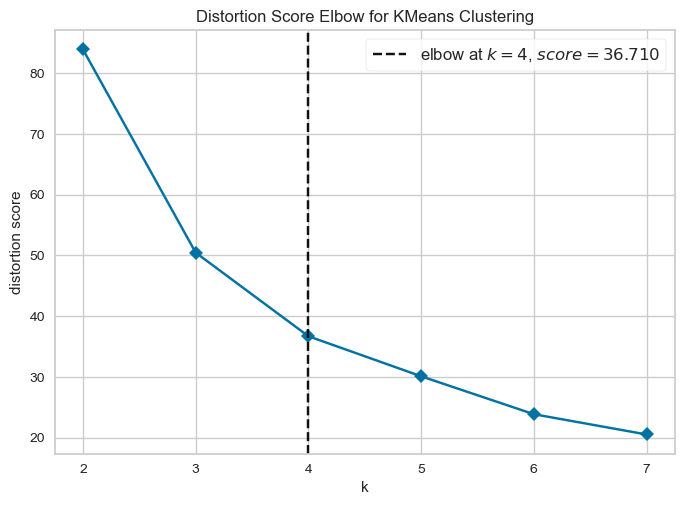

In [44]:
clusters = [2,3,4,5,6,7]
kmeans = KElbowVisualizer (KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

## Sillhouette Score 

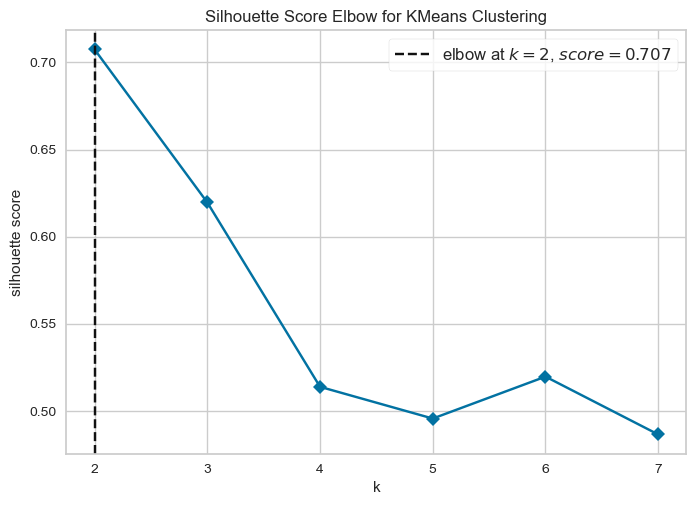

In [45]:
silhoutte = KElbowVisualizer(KMeans(), k=clusters, metric='silhouette',timings=False)
silhoutte.fit(X)
silhoutte.show();

## 8.1 Silhouette Analysis

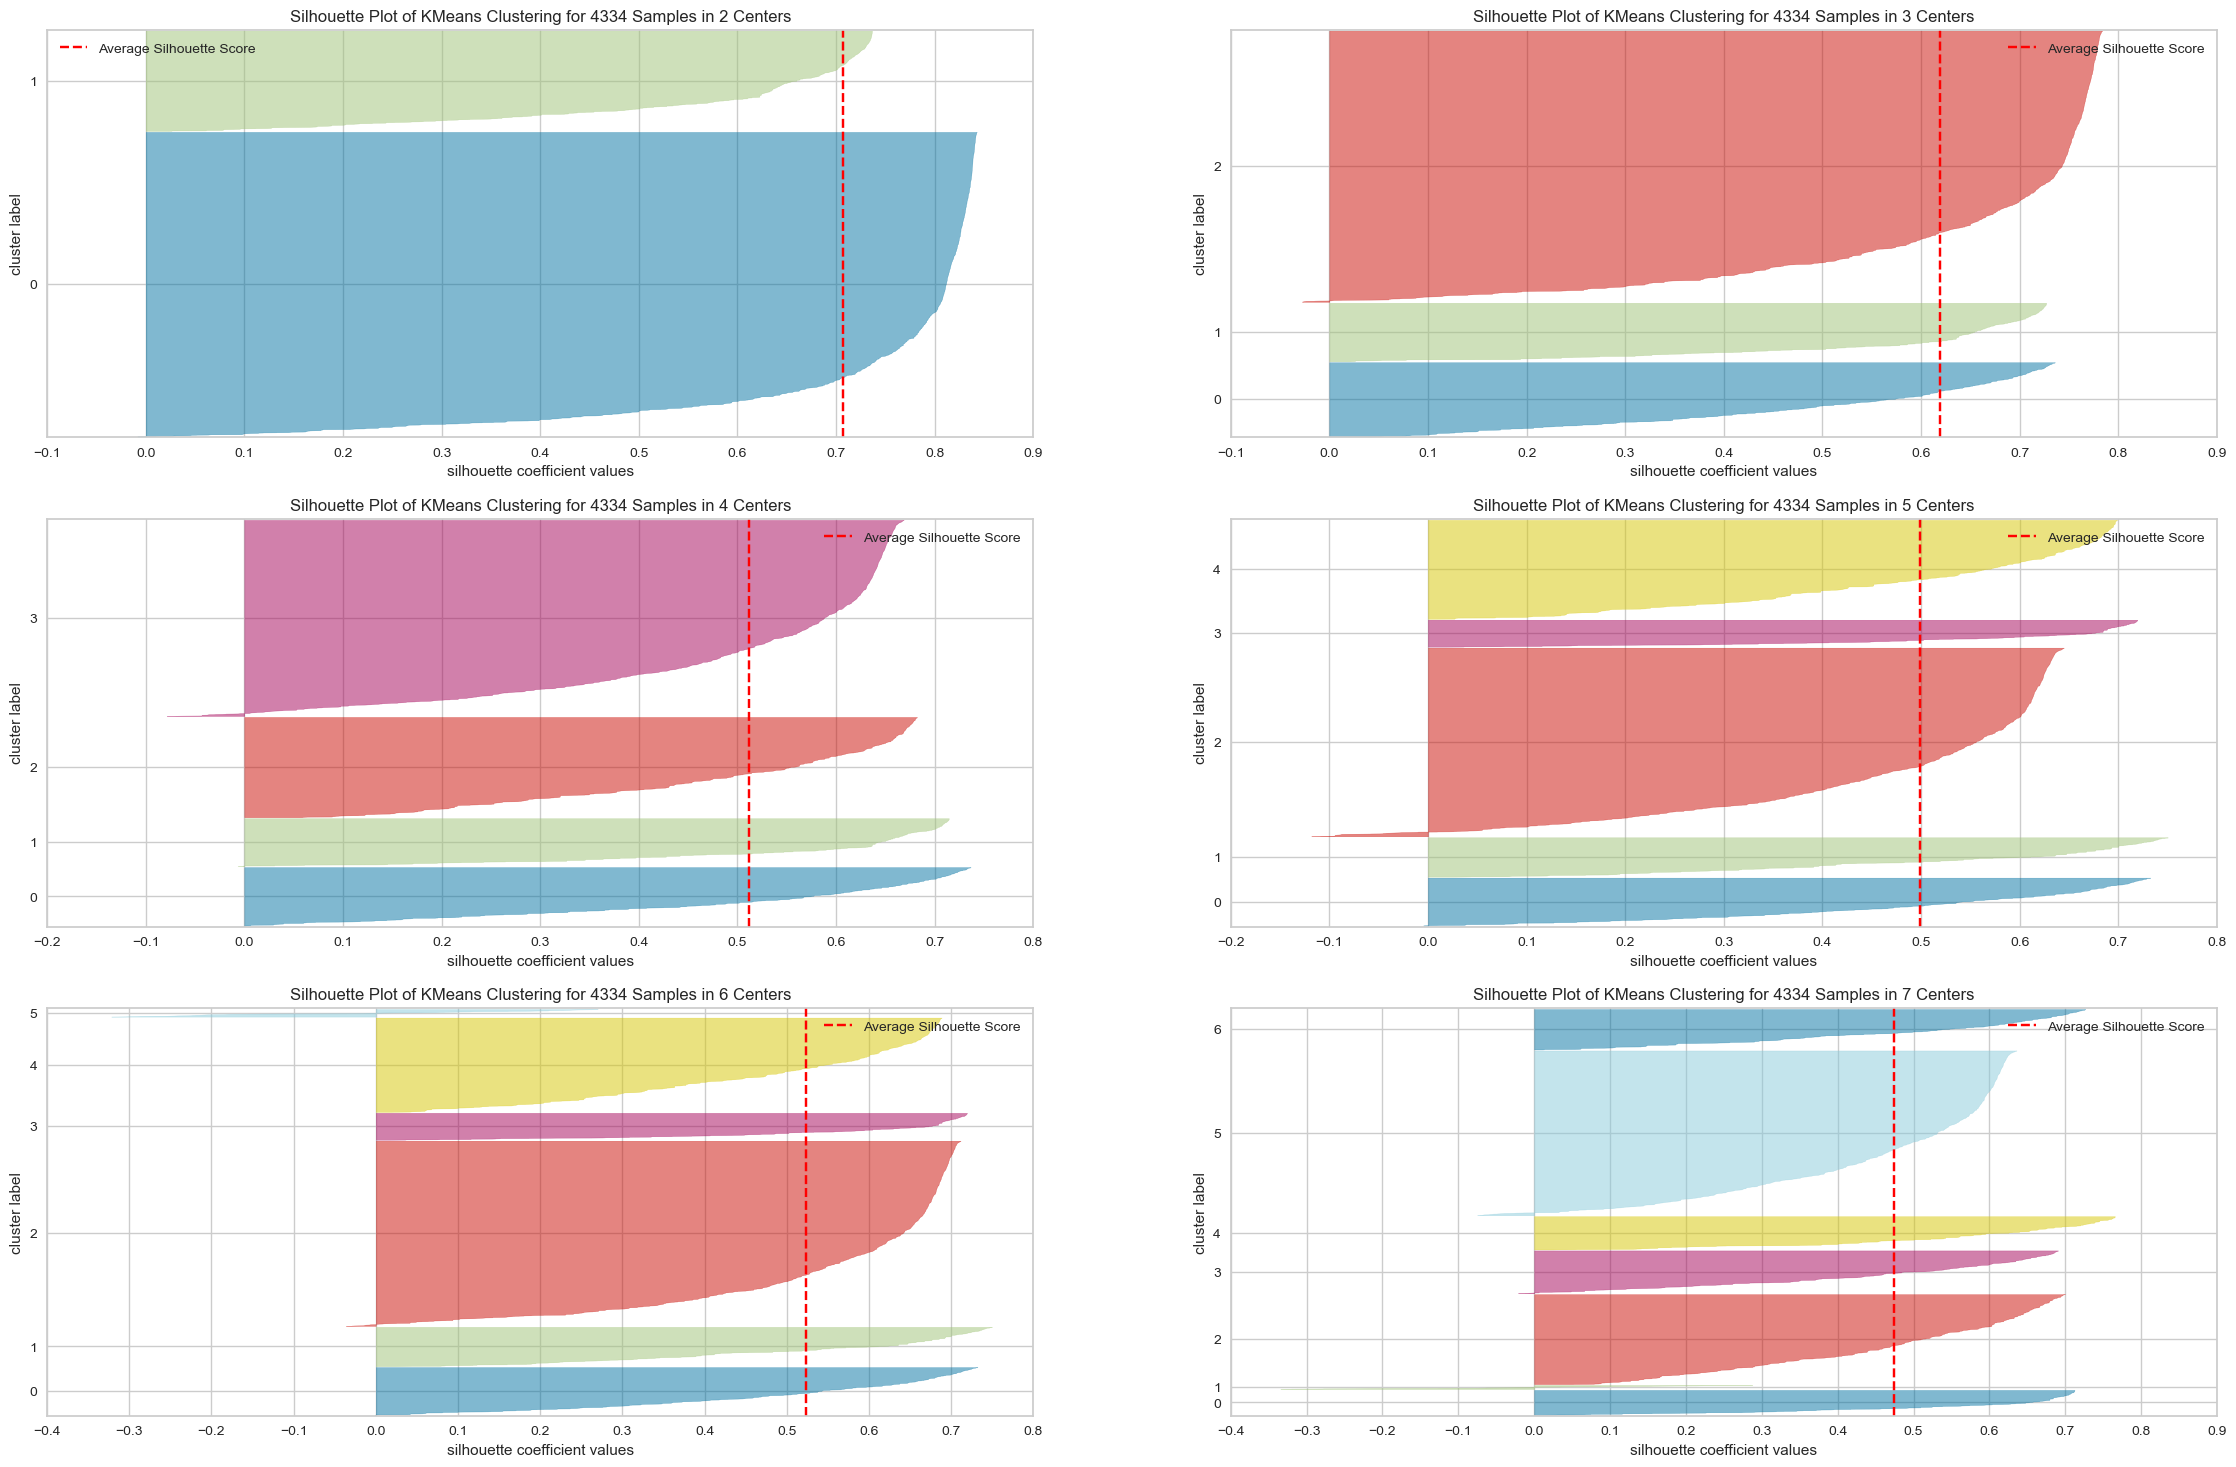

In [46]:
fig,ax = plt.subplots(3,2,figsize=(28,18))

for k in clusters:
    
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=SEED)
    
    #trick to multiplots
    q,mod = divmod(k,2)
    
    viz = SilhouetteVisualizer(km, colors='yellowbrick',ax=ax[q-1][mod] )
    viz.fit(X)
    viz.finalize()

<h3><font color='blue'> What we can observe is k=6 defining better clustering (low k doesnt split customers well)  than others with less SS < 0 and good inner cohesion </font></h3>

# 9. Model Training

## 9.1 K-Means

In [47]:
#previous defined num clusters
k = 6

In [48]:
#model definition
kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=SEED)

#model training
kmeans.fit(X)

#clustering
labels = kmeans.labels_

### 9.1.2 Cluster Validation (Performance)

In [49]:
#WSS
print('WSS value {}'.format(kmeans.inertia_))

#Silhoutte
print('Silhouette Score value {}'.format(metrics.silhouette_score(X, labels, metric='euclidean')))


WSS value 23.991802723021852
Silhouette Score value 0.5230920110044437


# 10. Cluster Analysis

## 10.1 Visual Inspection

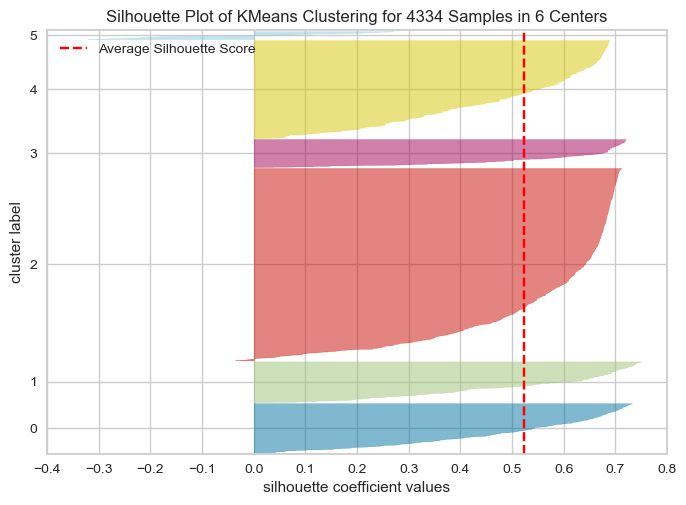

In [50]:
viz = SilhouetteVisualizer(kmeans, colors='yellowbrick')
viz.fit(X)
viz.finalize()

In [51]:
df10 = df7.copy()
df10['cluster'] = labels

### 10.2 2D plot

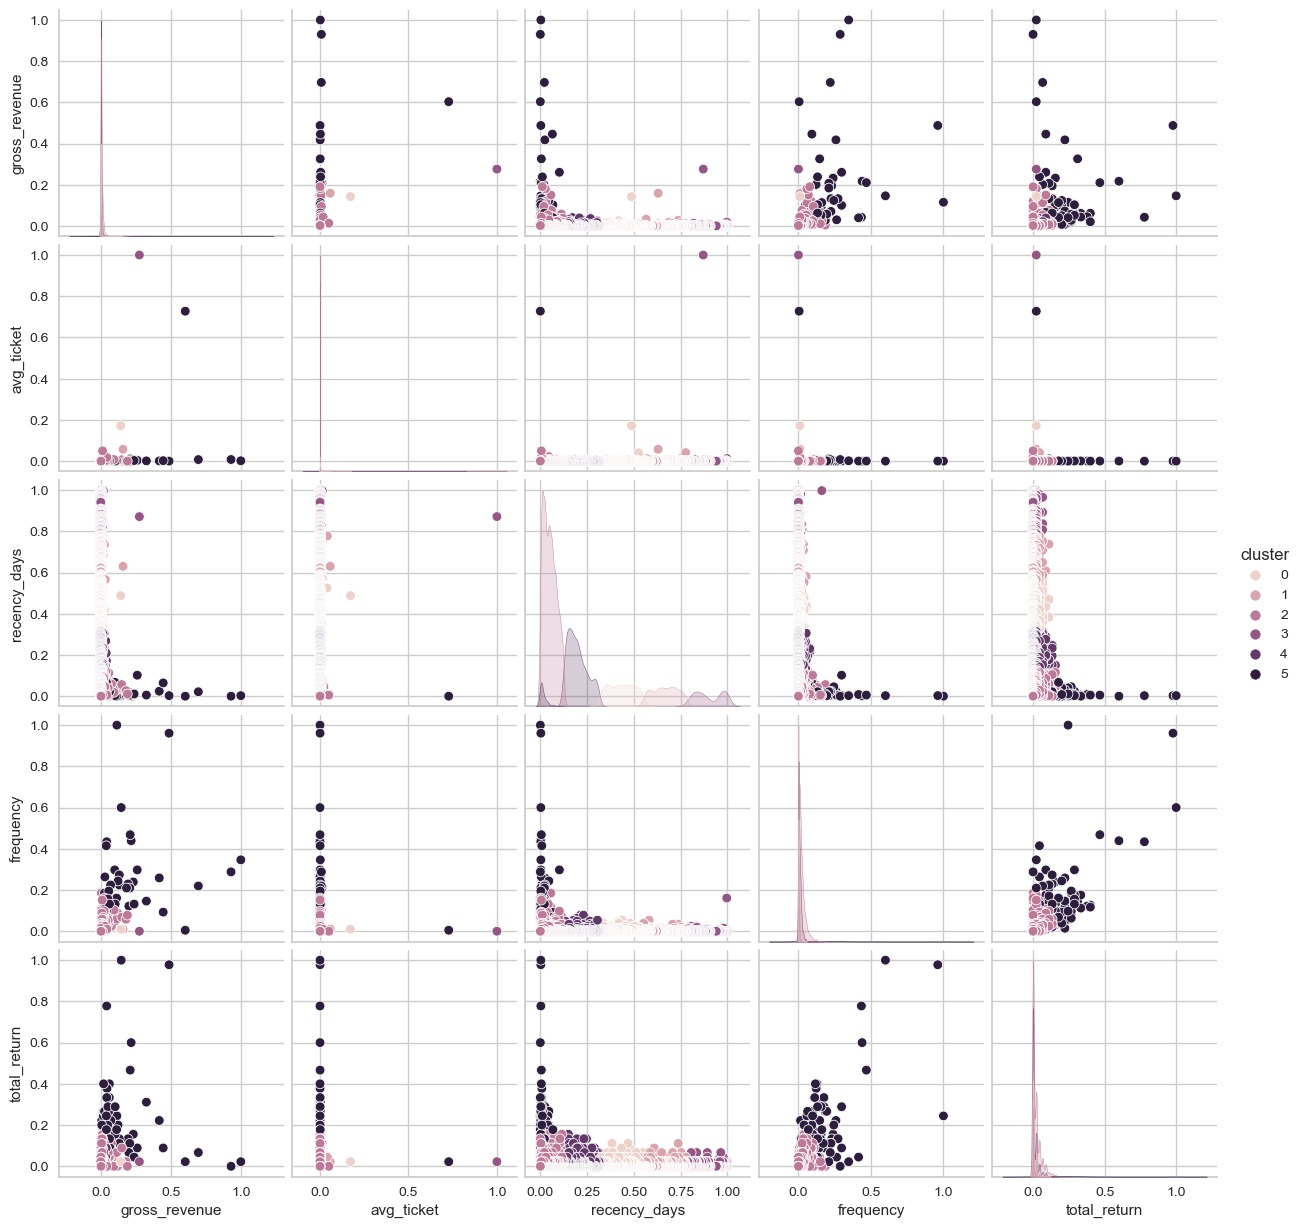

In [52]:
df_viz = df10.drop(columns='customer_id')
sns.pairplot(df_viz, hue='cluster');

## 10.3 UMAP

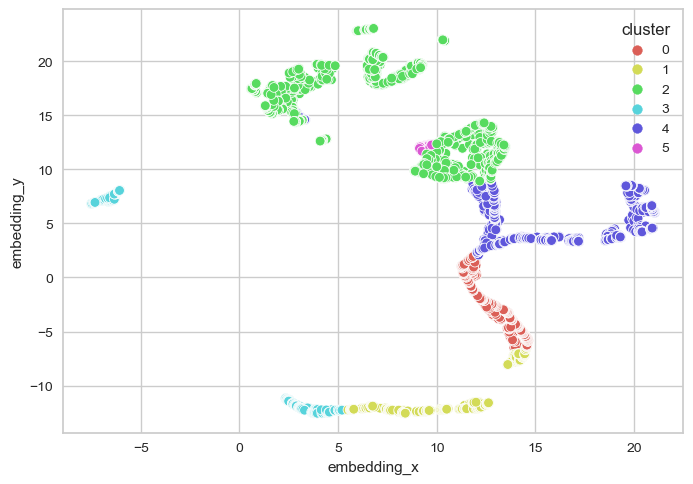

In [53]:
#instantiate a space reducer
reducer = umap.UMAP(n_neighbors=50, random_state=SEED)

#create a embedding space
embedding = reducer.fit_transform(X)

df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

#plot high dimensional space into 2d 
sns.scatterplot(x='embedding_x', y='embedding_y', hue='cluster',
                palette=sns.color_palette('hls', n_colors=len(df_viz['cluster'].unique())), 
                data=df_viz);

## 10.4 Cluster Profile

In [54]:
#Nuamber of Customers
df_cluster = df10[['customer_id', 'cluster']].groupby('cluster').count().reset_index().rename(columns={'customer_id':'qty_customers'})
df_cluster['perc_customers'] = (df_cluster['qty_customers'] / df_cluster['qty_customers'].sum())*100

# Average Gross Revenue
df_gr = df10[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index().rename(columns={'gross_revenue':'avg_revenue'})
df_cluster = pd.merge(df_cluster,df_gr, on='cluster', how='left')
 
#Average Recency
df_rec = df10[['recency_days', 'cluster']].groupby('cluster').mean().reset_index().rename(columns={'recency_days':'avg_recency'})
df_cluster = pd.merge(df_cluster,df_rec, on='cluster', how='left')

# Average Frequency
df_fre = df10[['frequency', 'cluster']].groupby('cluster').mean().reset_index().rename(columns={'frequency':'avg_frequency'})
df_cluster = pd.merge(df_cluster,df_fre, on='cluster', how='left')

#Average Ticket

df_ticket = df10[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_ticket, on='cluster', how='left')


### Cluster 01 (Insiders Eligible):
        - Customers Quantity: 6 (0.13% total)
        - Average Recency: 7 days
        - Average Frequency: 89 purchases
        - Average Revenue: $182.181 
        - Average Ticket: $254

### Cluster 02:
        - Customers Quantity: 28 (0.64% total)
        - Average Recency: 6 days
        - Average Frequency: 57 purchases
        - Average Revenue: $42.614
        - Average Ticket: $163

### Cluster 03:
        - Customers Quantity: 267 (6.1% total)
        - Average Recency: 20 days
        - Average Frequency: 19 purchases
        - Average Revenue: $8089
        - Average Ticket: $62

### Cluster 04:
        - Customers Quantity: 4071 (93,12% total)
        - Average Recency: 96 days
        - Average Frequency: 3 purchases
        - Average Revenue: $946
        - Average Ticket: $25

# 11. Model Deployment